In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [2]:
#Starting Regression Model
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.
        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
    
    def predict(self, X):
        '''
        Makes predictions using the simple line equation.
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X



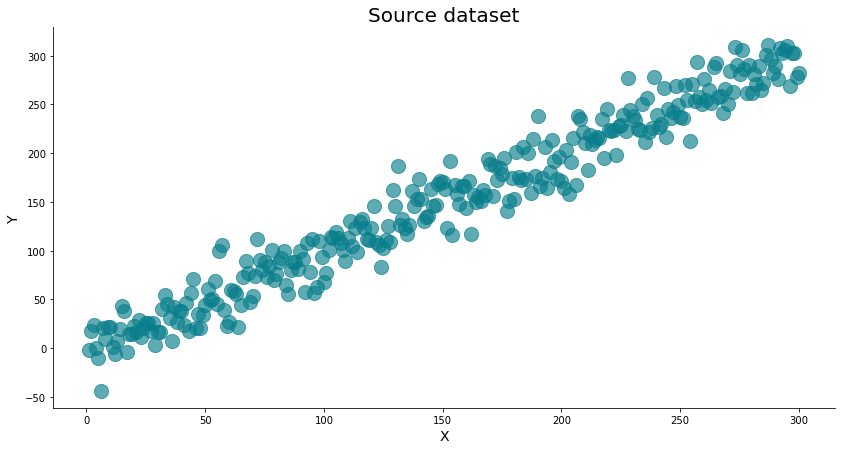

In [3]:
#Testing with some dummy data
X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [4]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Training the model
model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [6]:
#Getting the coefficients of the test model
model.b0, model.b1

(-1.7657729013137953, 1.0054285608843794)

In [7]:
#Getting the predictions
preds

array([203.34165352, 266.68365285, 152.06479691,   8.28851271,
       233.50451035, 226.46651042, 196.30365359, 108.8313688 ,
         4.26679846, 175.18965381, 237.52622459,  56.54908363,
       218.42308193,  44.4839409 , 182.22765374, 221.43936762,
       289.80850976, 211.38508201, 148.04308267, 165.13536821,
        77.66308341, 112.85308304, 249.59136732, 250.59679588,
       103.80422599,  41.46765522, 281.76508127, 295.84108112,
       157.09193972, 238.53165315,  16.33194119, 164.12993964,
        32.41879817,  23.36994112, 215.40679625, 118.8856544 ,
         6.27765559,  89.72822614,  45.48936946,  72.6359406 ,
        92.74451182,  75.65222629, 286.79222407,  59.56536931,
        76.65765485,  62.581655  , 234.50993891, 229.4827961 ,
       110.84222592, 231.49365322, 180.21679662, 144.02136843,
       239.53708171,  74.64679773, 297.85193824, 278.74879559,
        96.76622607,  91.73908326, 192.28193935,  24.37536968])

In [8]:
y_test

array([191.20260036, 258.29260255, 192.26916544,  21.2425349 ,
       250.36656517, 222.46561994, 192.42177796, 112.74738653,
       -43.38590986, 194.60914702, 226.20905618,  39.25819043,
       245.50121645,  20.30009739, 172.35763229, 223.33450903,
       289.74389839, 219.05405985, 171.0105795 , 150.8412234 ,
        69.51691075,  98.58140115, 237.19801416, 236.34923262,
       119.53175929,  18.06704301, 271.43221106, 268.53080783,
       166.03504598, 277.89321567,  14.06983168, 155.32794709,
        45.1114974 ,  25.83126457, 215.93733   , 122.98705731,
         9.0346711 ,  90.99657479,  34.93651785,  80.62746592,
        77.89875944,  84.53614074, 311.44891425,  59.81690654,
       100.88981817,  21.44338284, 211.75139743, 237.68588169,
       104.42628254, 224.38716974, 200.80950753, 163.66904012,
       239.40048435,  72.64488658, 302.87556216, 290.64902311,
       109.67481999, 107.6414878 , 206.30133806,  25.73867491])

In [9]:
#Getting the Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)

17.0464471768427

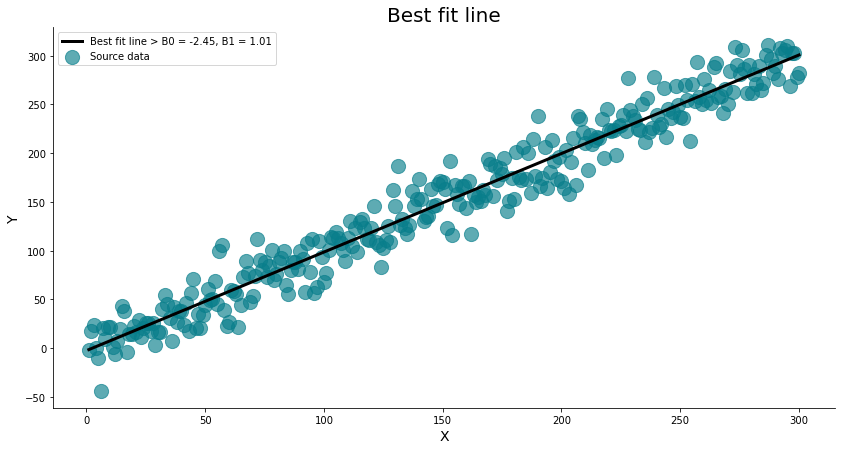

In [10]:
#Visualizing the Line of Best Fit
model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()

In [11]:
#Comparing model
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))
sk_model.intercept_, sk_model.coef_

(-1.7657729013137953, array([1.00542856]))

In [12]:
rmse(y_test, sk_preds)

17.0464471768427